In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler

Shape of the vector array: (801,)


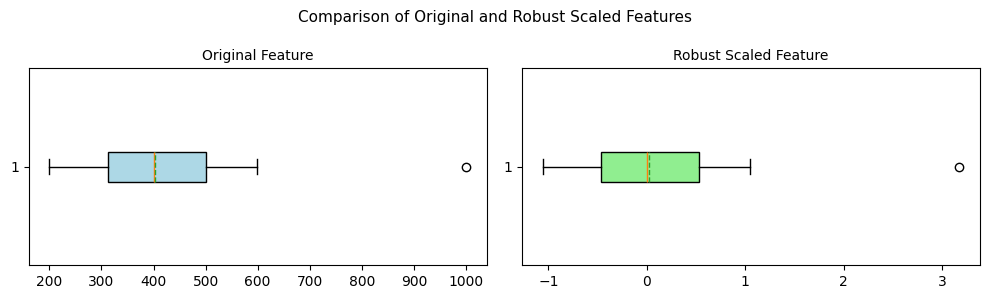

In [2]:
# Generate data 
np.random.seed(42)  
X = np.append(np.random.randint(low=200, high=600, size=800), [1000])  # Outlier at 1000
print(f'Shape of the vector array: {X.shape}')

# Robust Scaling (Normalization)
median = np.median(X)
Q3 = np.quantile(X, 0.75)
Q1 = np.quantile(X, 0.25)
X_RobustScaled = (X - median) / (Q3 - Q1)

# Plotting (Using boxplot)
plt.figure(figsize=(10, 3), facecolor='white')

plt.subplot(1, 2, 1)
plt.boxplot(X, vert=False, meanline=True, showmeans=True, 
            patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title('Original Feature', fontsize=10)

plt.subplot(1, 2, 2)
plt.boxplot(X_RobustScaled, vert=False, meanline=True, showmeans=True, 
            patch_artist=True, boxprops=dict(facecolor="lightgreen"))
plt.title('Robust Scaled Feature', fontsize=10)

plt.suptitle('Comparison of Original and Robust Scaled Features', fontsize=11)
plt.tight_layout()
plt.show()

In [3]:
# Set random seed for reproducibility
np.random.seed(42)

# Constructing an ndarray with features of different scales
X_train = np.array([
    np.append(np.random.randint(low=10, high=50, size=900), [90]),   # Feature 1: Outlier at 500
    np.append(np.random.randint(100, 500, size=900), [1000]),  # Feature 2: Outlier at 1000
    np.append(np.random.normal(50, 5, size=900), [80])   # Feature 3: Outlier at 200
]).T

In [4]:
# Min-Max Scaling (Randomization) (range [0, 1])
robust_scaler = RobustScaler()
robust_scaler.fit(X_train)
X_train_RobustScaled = robust_scaler.transform(X_train)

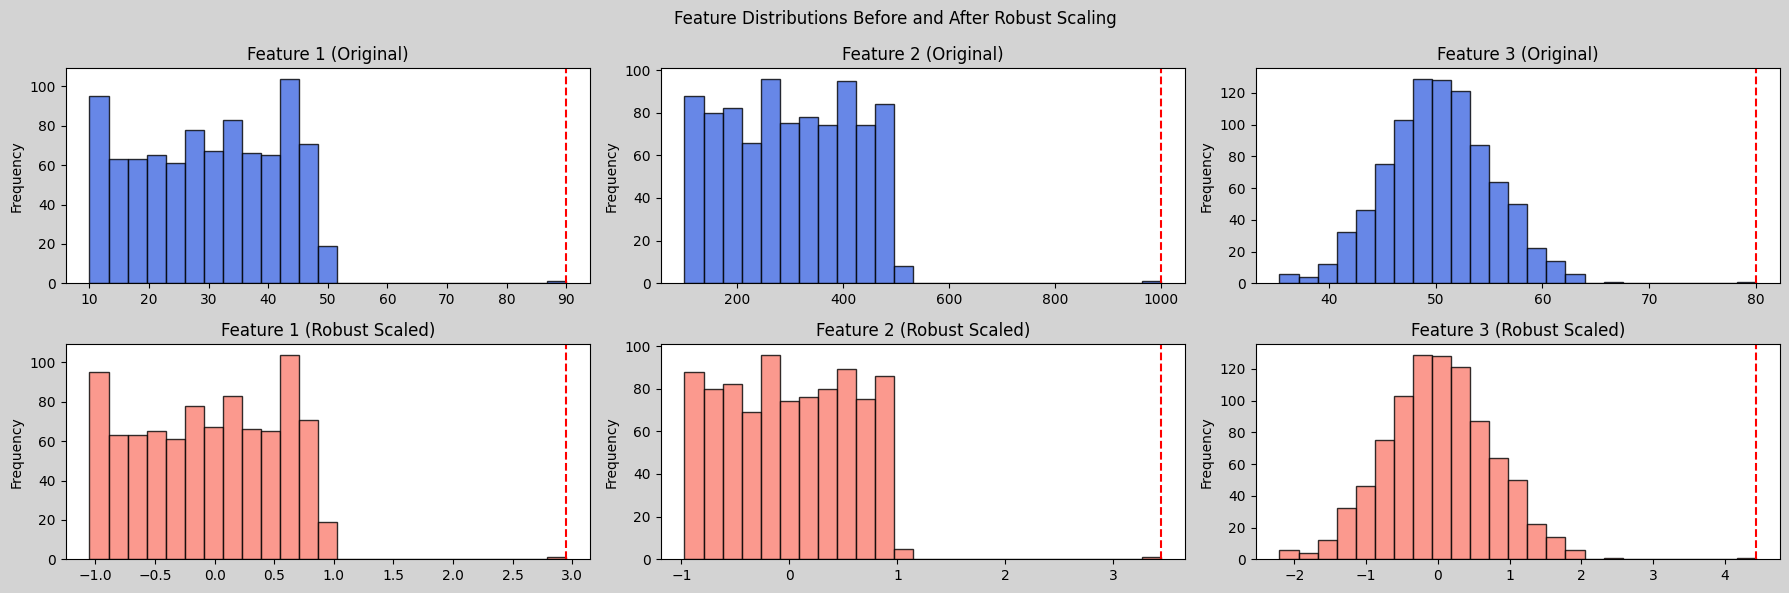

In [5]:
# Plotting
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 6), facecolor='lightgrey')
fig.suptitle('Feature Distributions Before and After Robust Scaling', size=12)

feature_names = ['Feature 1', 'Feature 2', 'Feature 3']

for i in range(3):
    axes[0, i].hist(X_train[:, i], bins=25, edgecolor='black', color='royalblue', alpha=0.8)
    axes[0, i].axvline(np.max(X_train[:, i]), color='red', linestyle='--')
    axes[0, i].set_title(f'{feature_names[i]} (Original)')
    axes[0, i].set_ylabel("Frequency")
    
    axes[1, i].hist(X_train_RobustScaled[:, i], bins=25, edgecolor='black', color='salmon', alpha=0.8)
    axes[1, i].axvline(np.max(X_train_RobustScaled[:, i]), color='red', linestyle='--')
    axes[1, i].set_title(f'{feature_names[i]} (Robust Scaled)')
    axes[1, i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()
